In [4]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2) # Khởi tạo trình tạo số ngẫu nhiên

Tiếp theo, chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng $y = 4 + 3x$, hiển thị chúng và tìm nghiệm theo công thức:
Chúng ta đang hướng đến trọng số: $w_0 = 4, w_1 = 3$

In [5]:
# Sinh dữ liệu ngẫu nhiên, dữ liệu gần với đồ thị hàm xác định f(x) + alpha.noise
# 1000 điểm trong khoảng 0-1
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

In [11]:
a = np.linspace(0, 32, 5, endpoint = False)
a

array([ 0. ,  6.4, 12.8, 19.2, 25.6])

Solution found by formula: w =  [[4.0071715  2.98225924]]


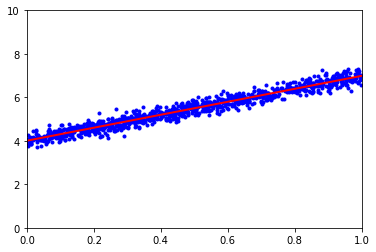

In [30]:
# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b) # Nghiệm theo công thức
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line
plt.plot(X.T, y.T, "b.")     # data
plt.plot(x0, y0, 'r', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

### Thử với gradient descent. Viết đạo hàm và hàm mất mát

$\mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2$

$\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} ~~~~~(1)$

In [5]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

### Kiểm tra đạo hàm: với $\varepsilon \approx 10^{-6}$ 
* Dựa vào tính chất của đạo hàm:

$f’(x) = \lim_{\varepsilon \rightarrow 0}\frac{f(x + \varepsilon) - f(x)}{\varepsilon}$
* Công thức xấp xỉ: 

$f’(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} ~~~~ (2)$

In [7]:
# Kiểm tra đạo hàm
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [6]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.
